# Signal processing using shapes

> The following notebook deals with the issue of deconvolving a signal, in this case, the fluorescence lifetime decay curve, from a (known or unknown) instrument response function. The data shown here has been collected from real experiments by CKT.

- toc: true
- branch: master
- badges: true
- comments: false
- author: Korak Ray, Anjali Verma, Ruben Gonzalez and Colin Kinz-Thompson
- categories: [deconvolution, calibration, MCMC]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.special
from math import lgamma

In [3]:
def evidence(y, x): # corresponds to Eq. 2.2.2 in SI for shape calculations
    
    N=float(x.size)
    
    ex = np.mean(x)
    exx = np.mean(x*x)
    ey = np.mean(y)
    eyy = np.mean(y*y)
    exy = np.mean(x*y)
    vx = exx - ex*ex
    vy = eyy - ey*ey
    vxy = exy - ex*ey
    r= vxy/np.sqrt(vx*vy)
    r2 = r**2
    m = (N-2.)/2.
     
    log_l = -m*np.log(np.pi)
    log_l += -N/2*np.log(N)
    log_l += lgamma(m) 
    log_l += -0.5*np.log(vx)
    log_l += -m*np.log(vy)
    log_l += -m*np.log(1.-r2) 
    log_l += -np.log(2)
    log_l += np.log(1.-(r/np.abs(r))*sc.special.betainc(0.5,m,r2))
    
    return log_l


print(evidence(np.random.rand(4), np.random.rand(4))) #checking it works

-1.272942348288285


The data collected is for the fluorescence lifetime of quininine (lit value = 19 ns) in the absence (q00) and in the presence of quenchers (q01-5). The time interval between data points is ~55ps (exact value given below). Each file comes embedded with the experimentally determined IRF (plotted below).

In [5]:
time, irf_q00, decay_q00, _, _ = np.loadtxt('q00_fit.txt', skiprows = 58).T

time = time*(0.1097394/2)

-16104.387989469074


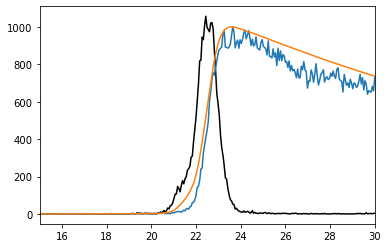

In [6]:
tau = np.arange(0, 3000)*(0.1097394/2)
fake_decay = np.exp(-tau/19.49)
signal = np.convolve(irf_q00, fake_decay)[:time.shape[0]]


plt.plot(time, irf_q00, 'k')
plt.plot(time, decay_q00)
plt.plot(time, 1000*signal/(signal.max()))
plt.xlim(15,30)


print(evidence(decay_q00, signal))

# Deconvolution based on known IRF #

The first approach is a brute force one. 4000 points are taken between 1 and 100 (ns), and the decay curves corresponding to these points are generated. These decays are convolved with the known IRF to generate templates which are then compared with the shape of the experimental decay using a log-evidence for the shape comparison. If we assume that the prior for the lifetime is uniform, the evidence is proportional to the posterior of the lifetime. This log-evidence is plotted for the 4000 points. The MAP is printed.

<u>Notes:</u>
1) Numpy's convolve function has three modes, 'full'(default), 'same', and 'overlap'. These determine the size of the convolved array (see docs for exact description). Ideally, since we need the same size for our template and data, one would assume that the 'same' mode is most suitable. However, I tried this and it seems 'same' truncates the convolved array in the wrong side (from the beginning and not the end). So I went with convolving in the 'full' mode, and then truncating manually. <br>
2) There is a shift parameter in the fitting software, which for these datasets, turns up a value of 3 datapoints. For this comparison, no shift is implemented. If needed, one could marginalise or estimate it.

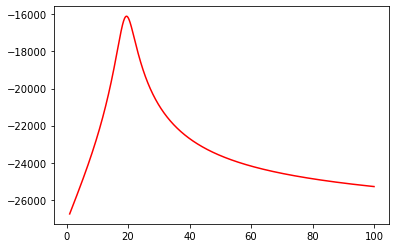

19.492873218304574


In [7]:
y_00 = []

tau = time.copy()

ts = np.linspace(1,100, 4000)

for t in ts:
    fake_decay = np.exp(-tau/t)
    signal = np.convolve(irf_q00, fake_decay)[:time.shape[0]]
    y_00.append(evidence(decay_q00, signal))

y_00 = np.array(y_00) 

plt.figure(1)
plt.plot(ts, y_00, 'r')
plt.show()

print(ts[np.argmax(y_00)])

In [8]:
time, irf_q01, decay_q01, _, _ = np.loadtxt('q01_fit.txt', skiprows = 58).T

time = time*(0.1097394/2)

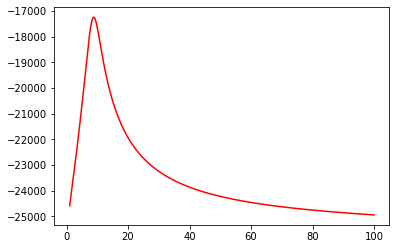

8.822955738934734


In [9]:
y_01 = []

tau = time.copy()

ts = np.linspace(1,100, 4000)

for t in ts:
    fake_decay = np.exp(-tau/t)
    signal = np.convolve(irf_q01, fake_decay)[:time.shape[0]]
 
    y_01.append(evidence(decay_q01, signal))

    
y_01 = np.array(y_01) 
plt.figure(1)
plt.plot(ts, y_01, 'r')
plt.show()

print(ts[np.argmax(y_01)])

In [10]:
time, irf_q02, decay_q02, _, _ = np.loadtxt('q02_fit.txt', skiprows = 58).T

time = time*(0.1097394/2)

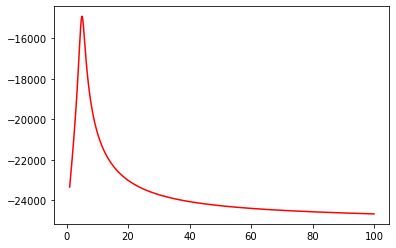

5.010502625656414


In [11]:
y_02 = []

tau = time.copy()

ts = np.linspace(1,100, 4000)

for t in ts:
    fake_decay = np.exp(-tau/t)
    signal = np.convolve(irf_q00, fake_decay)[:time.shape[0]]
    
    y_02.append(evidence(decay_q02, signal))

y_02 = np.array(y_02) 
plt.figure(1)
plt.plot(ts, y_02, 'r')
plt.show()

print(ts[np.argmax(y_02)])

In [12]:
time, irf_q03, decay_q03, _, _ = np.loadtxt('q03_fit.txt', skiprows = 58).T

time = time*(0.1097394/2)

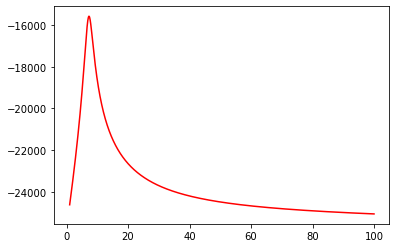

7.288072018004501


In [13]:
y_03 = []

tau = time.copy()

ts = np.linspace(1,100, 4000)

for t in ts:
    fake_decay = np.exp(-tau/t)
    signal = np.convolve(irf_q00, fake_decay)[:time.shape[0]]
    
    y_03.append(evidence(decay_q03, signal))

    
y_03 = np.array(y_03) 
plt.figure(1)
plt.plot(ts, y_03, 'r')
plt.show()

print(ts[np.argmax(y_03)])

In [14]:
time, irf_q04, decay_q04, _, _ = np.loadtxt('q04_fit.txt', skiprows = 58).T

time = time*(0.1097394/2)

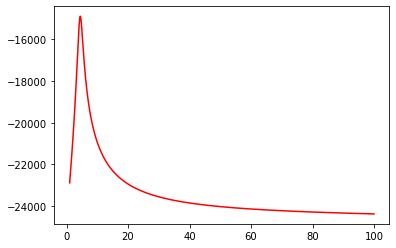

4.441110277569392


In [15]:
y_04 = []

tau = time.copy()

ts = np.linspace(1,100, 4000)

for t in ts:
    fake_decay = np.exp(-tau/t)
    signal = np.convolve(irf_q00, fake_decay)[:time.shape[0]]
    
    y_04.append(evidence(decay_q04, signal))
    
y_04 = np.array(y_04) 
plt.figure(1)
plt.plot(ts, y_04, 'r')
plt.show()

print(ts[np.argmax(y_04)])

In [16]:
time, irf_q05, decay_q05, _, _ = np.loadtxt('q05_fit.txt', skiprows = 58).T

time = time*(0.1097394/2)

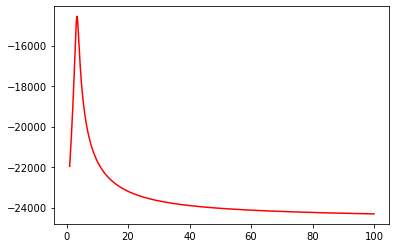

3.376594148537134


In [17]:
y_05 = []
y_p = []

tau = time.copy()

ts = np.linspace(1,100, 4000)

for t in ts:
    fake_decay = np.exp(-tau/t)
    signal = np.convolve(irf_q00, fake_decay)[:time.shape[0]]
    
    y_05.append(evidence(decay_q05, signal))
    
y_05 = np.array(y_05) 
plt.figure(1)
plt.plot(ts, y_05, 'r')
plt.show()

print(ts[np.argmax(y_05)])

The above seems to agree with both the known value for quinine and the fits. Now we see what happens when we try to introduce a different IRF to the computation. In this case, I have used a Gaussian IRF centered at 22.5ns and with a sigma of 0.1ns. The comparison with the experimental IRF is given below.

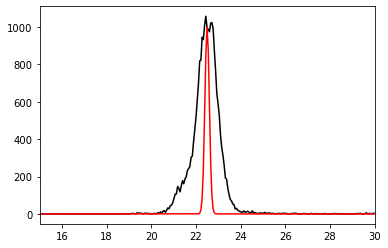

22.4417073


In [18]:
fake_decay = np.exp(-tau/19)
signal = np.convolve(irf_q00, fake_decay)[:time.shape[0]]

fake_irf = np.zeros_like(irf_q00)
fake_irf += 1000*np.exp(-((time - 22.5)**2)/(2*(0.1)**2))

plt.plot(time, irf_q00, 'k')
plt.plot(time, fake_irf, 'r')
#plt.plot(time, decay_q00)
#plt.plot(time, signal/25)
plt.xlim(15,30)
plt.show()

print(time[np.argmax(irf_q00)])

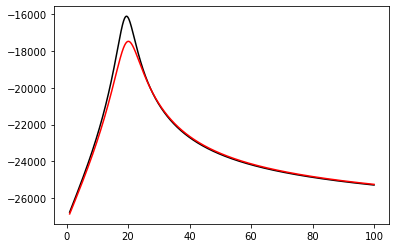

19.492873218304574
20.087021755438858


In [19]:
y_00_f = []
y_p = []

tau = time.copy()

ts = np.linspace(1,100, 4000)
#print()

for t in ts:
    fake_decay = np.exp(-tau/t)
    signal = np.convolve(fake_irf, fake_decay)[:time.shape[0]]
    
    y_00_f.append(evidence(decay_q00, signal))
    
y_00_f = np.array(y_00_f) 
plt.figure(1)
plt.plot(ts, y_00, 'k')
plt.plot(ts, y_00_f, 'r')
plt.show()

print(ts[np.argmax(y_00)])
print(ts[np.argmax(y_00_f)])

The above curve shows that M_guess has a lower evidence (area under the curve) than M_exp. This suggest that our guess IRF with a sigma of 0.1ns is a worse model for the IRF than the experimentally determined function, as would be expected. Now we see if we can find a better model for our IRF than our rudimentary guess.

# IRF Calibration based on Known Decay #

Next up, we try to estimate what the most probable width of the IRF is based on a known value of decay for a signal. For example, the literature value for the fluorescence lifetime of quinine is 19ns. If we use this value to calculate a decay, we want to find what width of IRF gives a signal which is most similar in shape to the experimental signal. Below, the posterior for the sigma of the IRF is shown, the MAP is printed and the IRF corresponding to this MAP sigma is compared to the experimentally determined IRF.

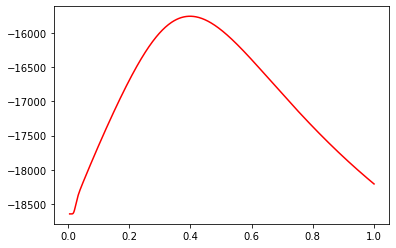

0.39781563126252506


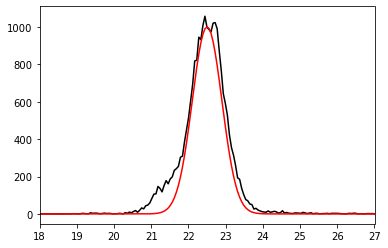

In [20]:
p_irf = []

tau = time.copy()

ws = np.linspace(0.005, 1, 500)

fake_decay = np.exp(-tau/19.)

for w in ws:
    fake_irf = np.zeros_like(time)
    fake_irf += 1000*np.exp(-((time - 22.5)**2)/(2*(w)**2))
    signal = np.convolve(fake_irf, fake_decay)[:time.shape[0]]
        
    p_irf.append(evidence(decay_q00, signal))

p_irf = np.array(p_irf)

plt.plot(ws, p_irf, 'r')
plt.show()

print(ws[np.argmax(p_irf)])

fake_irf = np.zeros_like(time)
fake_irf += 1000*np.exp(-((time - 22.5)**2)/(2*(ws[np.argmax(p_irf)])**2))

plt.plot(time, irf_q00, 'k')
plt.plot(time, fake_irf, 'r')
plt.xlim(18,27)
plt.show()

We see that the inferred IRF looks similar to the experimental IRF. Thus, we can deconvolve in both directions, from a known IRF to an unknown decay, and from a known decay to an unknown IRF. But what happens if both are unknown?

# Blind Deconvolution #

Next, we see if we can infer both the width and decay from a signal where both are not known. This process is called 'blind deconvolution'. Below, we brute force the entire 2D log-posterior for both the sigma and the lifetime. The 1D marginalised posteriors for both are shown, the MAPs are printed and the corresponding IRF/decay signal is compared to the experimental signal.

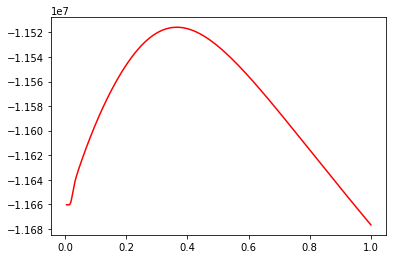

0.36591182364729463


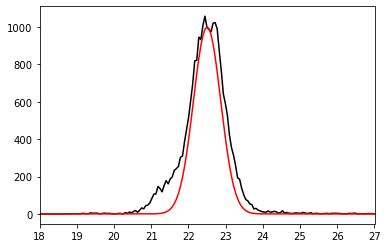

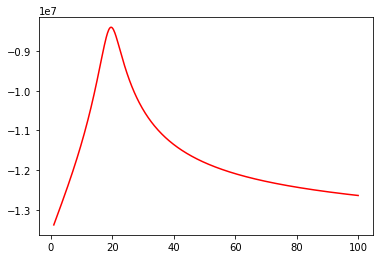

19.649298597194388


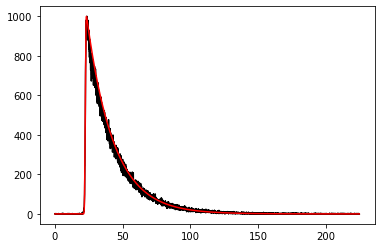

In [21]:
p_blind = []

tau = time.copy()

ws = np.linspace(0.005, 1, 500)
ts = np.linspace(1,100, 500)

for w in ws:
    fake_irf = np.zeros_like(time)
    fake_irf += 1000*np.exp(-((time - 22.5)**2)/(2*(w)**2))
    p_decay = []
    for t in ts:
        fake_decay = np.exp(-tau/t)
        signal = np.convolve(fake_irf, fake_decay)[:time.shape[0]]
        p_decay.append(evidence(decay_q00, signal))
    
    p_blind.append(p_decay)

p_blind = np.array(p_blind)

p_irf = p_blind.sum(1)
plt.plot(ws, p_irf, 'r')
plt.show()

print(ws[np.argmax(p_irf)])

fake_irf = np.zeros_like(time)
fake_irf += 1000*np.exp(-((time - 22.5)**2)/(2*(ws[np.argmax(p_irf)])**2))

plt.plot(time, irf_q00, 'k')
plt.plot(time, fake_irf, 'r')
plt.xlim(18,27)
plt.show()

p_decay = p_blind.sum(0)
plt.plot(ts, p_decay, 'r')
plt.show()

print(ts[np.argmax(p_decay)])

fake_decay = np.exp(-tau/ts[np.argmax(p_decay)])
signal = np.convolve(fake_irf, fake_decay)[:time.shape[0]]


plt.plot(time, decay_q00, 'k')
plt.plot(time, 1000*signal/(signal.max()), 'r')
#plt.xlim(18,27)
plt.show()


In [22]:
from matplotlib import cm

The surface plot of the 2D posterior is plotted below.

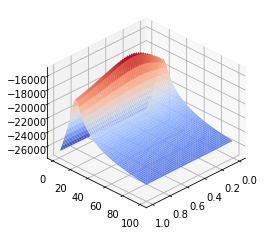

In [23]:
t_g, w_g = np.meshgrid(ts, ws)


fig, ax = plt.subplots(subplot_kw={"projection": "3d", "proj_type" : "ortho"})
ax.view_init(30, 45)
ax.plot_surface(w_g, t_g, p_blind, cmap = cm.coolwarm, antialiased = 'True')

The same is done for the dataset "q01".

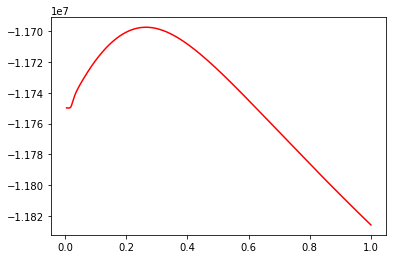

0.2642184368737475


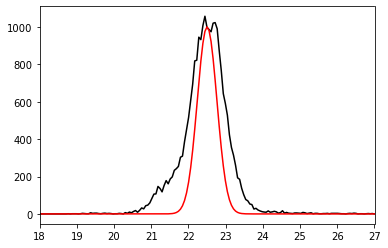

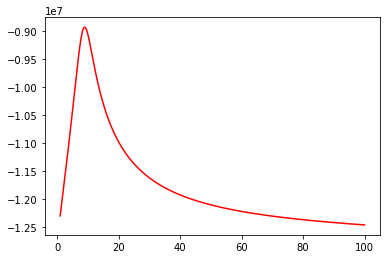

8.935871743486974


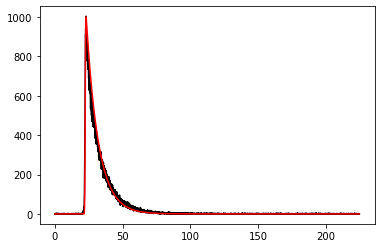

In [24]:
p_blind_01 = []

tau = time.copy()

ws = np.linspace(0.005, 1, 500)
ts = np.linspace(1,100, 500)

for w in ws:
    fake_irf = np.zeros_like(time)
    fake_irf += 1000*np.exp(-((time - 22.5)**2)/(2*(w)**2))
    p_decay_01 = []
    for t in ts:
        fake_decay = np.exp(-tau/t)
        signal = np.convolve(fake_irf, fake_decay)[:time.shape[0]]
        p_decay_01.append(evidence(decay_q01, signal))
    
    p_blind_01.append(p_decay_01)

p_blind_01 = np.array(p_blind_01)

p_irf_01 = p_blind_01.sum(1)
plt.plot(ws, p_irf_01, 'r')
plt.show()

print(ws[np.argmax(p_irf_01)])

fake_irf = np.zeros_like(time)
fake_irf += 1000*np.exp(-((time - 22.5)**2)/(2*(ws[np.argmax(p_irf_01)])**2))

plt.plot(time, irf_q01, 'k')
plt.plot(time, fake_irf, 'r')
plt.xlim(18,27)
plt.show()

p_decay_01 = p_blind_01.sum(0)
plt.plot(ts, p_decay_01, 'r')
plt.show()

print(ts[np.argmax(p_decay_01)])

fake_decay = np.exp(-tau/ts[np.argmax(p_decay_01)])
signal_01 = np.convolve(fake_irf, fake_decay)[:time.shape[0]]


plt.plot(time, decay_q01, 'k')
plt.plot(time, 1000*signal_01/(signal_01.max()), 'r')
#plt.xlim(18,27)
plt.show()

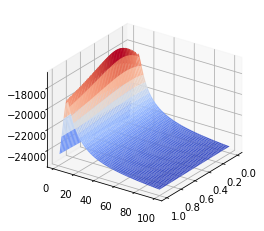

In [25]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d", "proj_type" : "ortho"})
ax.view_init(25, 35)
ax.plot_surface(w_g, t_g, p_blind_01, cmap = cm.coolwarm, antialiased = 'True')

# MCMC Sampling #

Brute force grid searching is inefficient and hard to visualize, when the posterior has more than 2 dimensions. Therefore, we move to an MCMC sampling approach. First we show that our above approach of blind deconvolution for each individual signal can be replicated with MCMC. 

In [26]:
import emcee as mc
import corner as cor
from tqdm.notebook import tqdm

The posterior is defined using the evidence function between the guess signal and the experimental signal as the likelihood, and using uniform priors for sigma and lifetime.

sigma ~ Uniform(0., 1.) <br>
Lifetime ~ Uniform(0.,100.)

In [27]:
def log_post(param, decay, time):
    if param[0] <= 0. or param[1] <= 0.:
        return -np.inf
    
    if param[0] > 100. or param[1] > 1.:
        return -np.inf
    
    t1 = param[0]
    sigma = param[1]
    fake_irf = np.zeros_like(time)
    fake_irf += 1000*np.exp(-((time - 22.5)**2)/(2*(sigma)**2))
    
    fake_decay = np.exp(-tau/t1)
    signal = np.convolve(fake_irf, fake_decay)[:time.shape[0]]
    
    log_l = evidence(decay, signal)
    
    return log_l
    

We define the same sampling condition for all datasets. The MCMC algorithm will use 50 walkers, the same initialisations, and will sample for 5000 steps, after a burn-in of 500 steps. For each dataset, the likelihood for all of the walkers are plotted both during the burn-in and production run, to ensure that the walkers are properly equilibriated during production.

At the end, uncorrrelated samples are collected from the MCMC chains by only accepting samples at the interval of the maximum autocorrelation time of the chains. A corner plot of the histograms of these uncorrelated samples is generated.

In [28]:
ndim = 2
nwalkers = 50

np.random.seed(666)
p0 = [np.array([19., 0.1]) + 1e-6*np.random.rand(ndim) for _ in range(nwalkers)]

In [29]:
sampler0 = mc.EnsembleSampler(nwalkers, ndim, log_post, args=[decay_q00, time])

  0%|          | 0/500 [00:00<?, ?it/s]

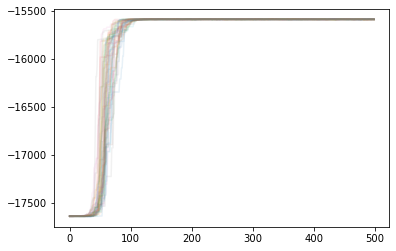

(50, 2)


  0%|          | 0/5000 [00:00<?, ?it/s]

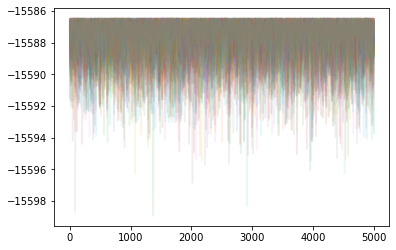

In [30]:
init = 500
for i, result in enumerate(tqdm(sampler0.sample(p0,iterations = init), total = init)): pass
p1 = sampler0.chain[:,-1].copy()

plt.plot(sampler0.lnprobability.T, alpha = 0.1)
plt.show()

sampler0.reset()

print(p1.shape)
init = 5000
for i, result in enumerate(tqdm(sampler0.sample(p1,iterations = init), total = init)): pass

plt.plot(sampler0.lnprobability.T, alpha = 0.1)
plt.show()

(8334, 2)


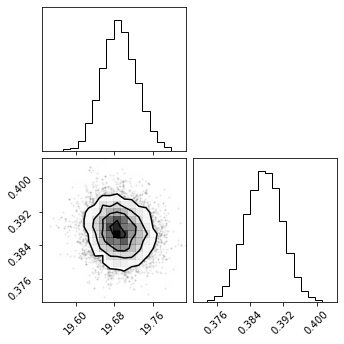

In [31]:
samples0 = sampler0.get_chain(flat=True)[::int(sampler0.get_autocorr_time().max())]
print(samples0.shape)
cor.corner(samples0)
plt.show()

  0%|          | 0/500 [00:00<?, ?it/s]

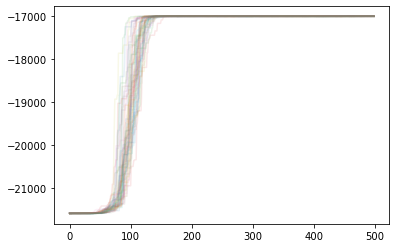

(50, 2)


  0%|          | 0/5000 [00:00<?, ?it/s]

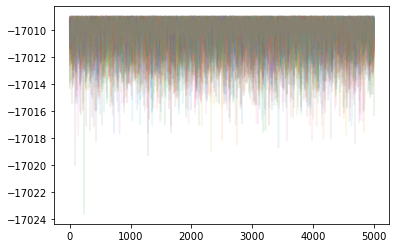

In [32]:
sampler = mc.EnsembleSampler(nwalkers, ndim, log_post, args=[decay_q01, time])

init = 500
for i, result in enumerate(tqdm(sampler.sample(p0,iterations = init), total = init)): pass
p1 = sampler.chain[:,-1].copy()

plt.plot(sampler.lnprobability.T, alpha = 0.1)
plt.show()


sampler.reset()

print(p1.shape)
init = 5000
for i, result in enumerate(tqdm(sampler.sample(p1,iterations = init), total = init)): pass

plt.plot(sampler.lnprobability.T, alpha = 0.1)
plt.show()

(8065, 2)


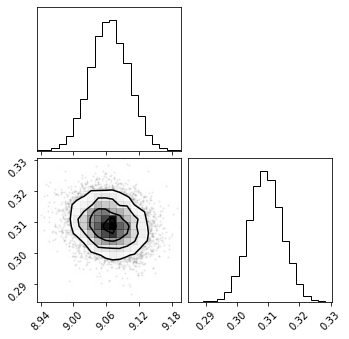

In [33]:
samples = sampler.get_chain(flat=True)[::int(sampler.get_autocorr_time().max())]
print(samples.shape)
fig = cor.corner(samples)
plt.show()

  0%|          | 0/500 [00:00<?, ?it/s]

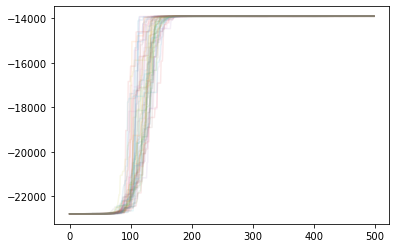

(50, 2)


  0%|          | 0/5000 [00:00<?, ?it/s]

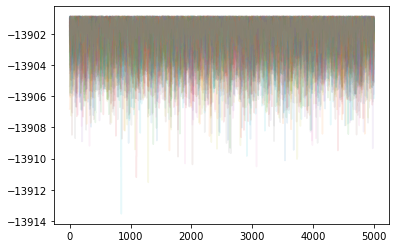

In [34]:
sampler2 = mc.EnsembleSampler(nwalkers, ndim, log_post, args=[decay_q02, time])

init = 500
for i, result in enumerate(tqdm(sampler2.sample(p0,iterations = init), total = init)): pass
p1 = sampler2.chain[:,-1].copy()

plt.plot(sampler2.lnprobability.T, alpha = 0.1)
plt.show()


sampler2.reset()

print(p1.shape)
init = 5000
for i, result in enumerate(tqdm(sampler2.sample(p1,iterations = init), total = init)): pass

plt.plot(sampler2.lnprobability.T, alpha = 0.1)
plt.show()

(7813, 2)


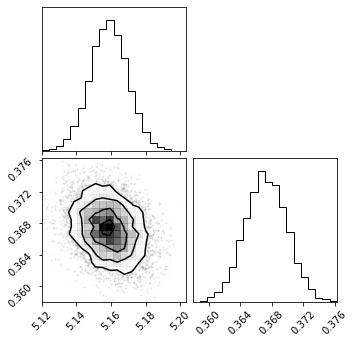

In [35]:
samples2 = sampler2.get_chain(flat=True)[::int(sampler2.get_autocorr_time().max())]
print(samples2.shape)
fig = cor.corner(samples2)
plt.show()

  0%|          | 0/500 [00:00<?, ?it/s]

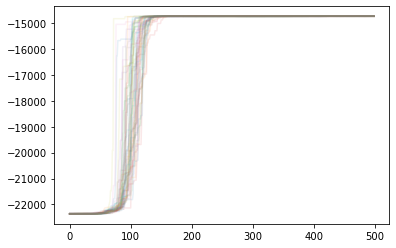

(50, 2)


  0%|          | 0/5000 [00:00<?, ?it/s]

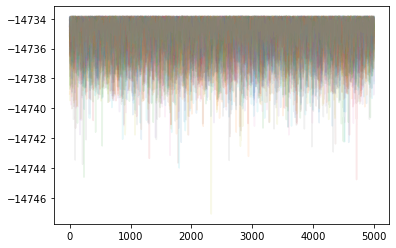

In [36]:
sampler3 = mc.EnsembleSampler(nwalkers, ndim, log_post, args=[decay_q03, time])

init = 500
for i, result in enumerate(tqdm(sampler3.sample(p0,iterations = init), total = init)): pass
p1 = sampler3.chain[:,-1].copy()

plt.plot(sampler3.lnprobability.T, alpha = 0.1)
plt.show()

sampler3.reset()

print(p1.shape)
init = 5000
for i, result in enumerate(tqdm(sampler3.sample(p1,iterations = init), total = init)): pass

plt.plot(sampler3.lnprobability.T, alpha = 0.1)
plt.show()

(8621, 2)


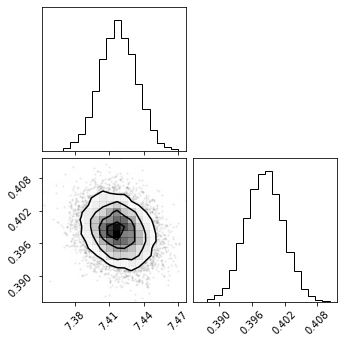

In [37]:
samples3 = sampler3.get_chain(flat=True)[::int(sampler3.get_autocorr_time().max())]
print(samples3.shape)
fig = cor.corner(samples3)
plt.show()

  0%|          | 0/500 [00:00<?, ?it/s]

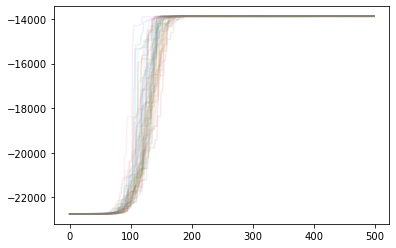

(50, 2)


  0%|          | 0/5000 [00:00<?, ?it/s]

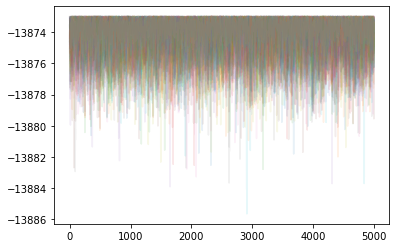

In [38]:
sampler4 = mc.EnsembleSampler(nwalkers, ndim, log_post, args=[decay_q04, time])

init = 500
for i, result in enumerate(tqdm(sampler4.sample(p0,iterations = init), total = init)): pass
p1 = sampler4.chain[:,-1].copy()

plt.plot(sampler4.lnprobability.T, alpha = 0.1)
plt.show()

sampler4.reset()

print(p1.shape)
init = 5000
for i, result in enumerate(tqdm(sampler4.sample(p1,iterations = init), total = init)): pass

plt.plot(sampler4.lnprobability.T, alpha = 0.1)
plt.show()

(8334, 2)


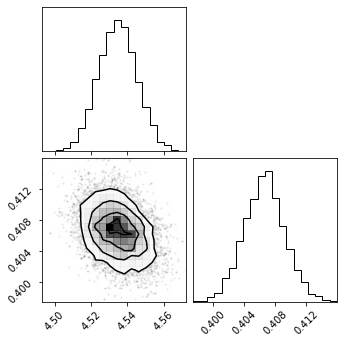

In [39]:
samples4 = sampler4.get_chain(flat=True)[::int(sampler4.get_autocorr_time().max())]
print(samples4.shape)
fig = cor.corner(samples4)
plt.show()

  0%|          | 0/500 [00:00<?, ?it/s]

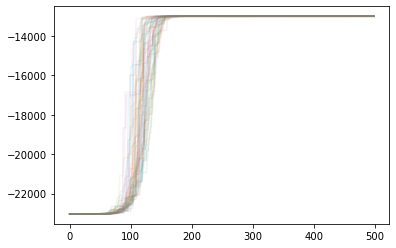

(50, 2)


  0%|          | 0/5000 [00:00<?, ?it/s]

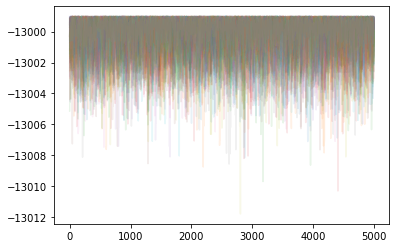

In [40]:
sampler5 = mc.EnsembleSampler(nwalkers, ndim, log_post, args=[decay_q05, time])

init = 500
for i, result in enumerate(tqdm(sampler5.sample(p0,iterations = init), total = init)): pass
p1 = sampler5.chain[:,-1].copy()

plt.plot(sampler5.lnprobability.T, alpha = 0.1)
plt.show()

sampler5.reset()

print(p1.shape)
init = 5000
for i, result in enumerate(tqdm(sampler5.sample(p1,iterations = init), total = init)): pass

plt.plot(sampler5.lnprobability.T, alpha = 0.1)
plt.show()

(8334, 2)


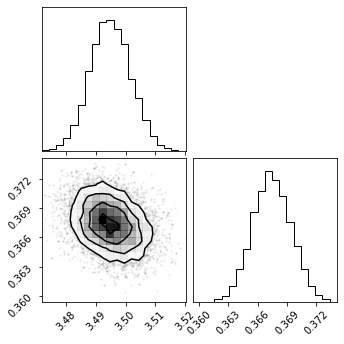

In [41]:
samples5 = sampler5.get_chain(flat=True)[::int(sampler5.get_autocorr_time().max())]
print(samples5.shape)
fig = cor.corner(samples5)
plt.show()

We see above that the results from the MCMC match the ones of the grid search relatively well. However, interestingly, in both cases, the blind deconvolution of individual signals lead to a slightly different result for the IRF. Ideally, the IRF should be the same for all signals. Can we get this consensus IRF by analysing multiple signals at once?

# Consensus Blind Deconvolution #

We define a new posterior function which is capable of analysing an arbitrary numbe of decay functions simultaneously. The exact dimensionality of the posterior is determined by the input decay array.

In [42]:
def log_post2(param, decay, time):
    if len(decay) != param.shape[0] - 1:
        return np.NaN
    
    if np.any(param <= 0.):
        return -np.inf
    
    if np.any(param[:-1] > 100.) or param[-1] > 1.:
        return -np.inf
    
    
    sigma = param[-1]
    fake_irf = np.zeros_like(time)
    fake_irf += 1000*np.exp(-((time - 22.5)**2)/(2*(sigma)**2))
    
    log_l = 0
    
    tau = time
    for i,t in enumerate(param[:-1]):
        fake_decay = np.exp(-tau/t)
        signal = np.convolve(fake_irf, fake_decay)[:time.shape[0]]
        log_l += evidence(decay[i], signal)
    
    return log_l
    

First, we see if we can model two decays simultaneously. This is a 3-dimensional problem. The code is written so that once the decay list has been constructed, the dimensionality of the problem is set. However, the initialization array still needs to be amended in terms of dimensionality.

-40315.19945316909


  0%|          | 0/500 [00:00<?, ?it/s]

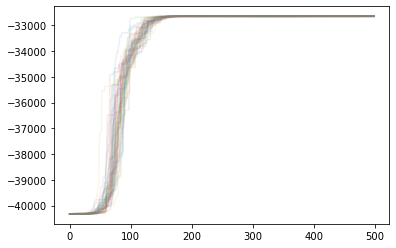

(50, 3)


  0%|          | 0/5000 [00:00<?, ?it/s]

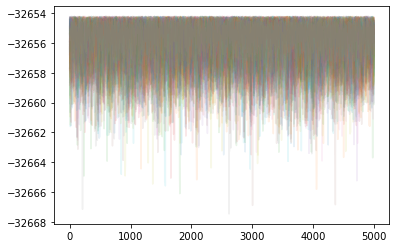

In [43]:
decay = [decay_q00, decay_q01]
ndim = len(decay) + 1
nwalkers = 50

np.random.seed(666)
p0 = [np.array([15.,15., 0.1]) + 1e-6*np.random.rand(ndim) for _ in range(nwalkers)]

print(log_post2(p0[0], decay, time))

sampler_all1 = mc.EnsembleSampler(nwalkers, ndim, log_post2, args=[decay, time])

init = 500
for i, result in enumerate(tqdm(sampler_all1.sample(p0,iterations = init), total = init)): pass
p1 = sampler_all1.chain[:,-1].copy()

plt.plot(sampler_all1.lnprobability.T, alpha = 0.1)
plt.show()

sampler_all1.reset()

print(p1.shape)
init = 5000
for i, result in enumerate(tqdm(sampler_all1.sample(p1,iterations = init), total = init)): pass

plt.plot(sampler_all1.lnprobability.T, alpha = 0.1)
plt.show()

(6098, 3)


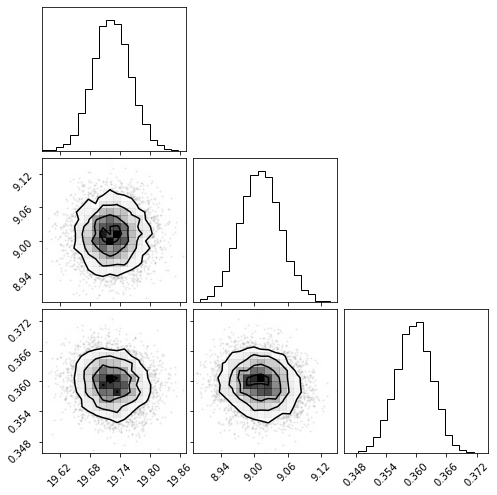

In [44]:
samples_all1 = sampler_all1.get_chain(flat=True)[::int(sampler_all1.get_autocorr_time().max())]
print(samples_all1.shape)
fig = cor.corner(samples_all1)
plt.show()

The MAPs for the decay lifetimes seem to agree with the 2D estimates. As expected, the consensus IRF sigma is estimated to be somewhere between the 2D estimates. The evolution of the likelihoods along the change also indicates that this is not a difficult space for the walkers to explore.

Next, we move on to the problem of consensus blind deconvolution for all 6 decays. As can be seen, this posterior space is difficult to traverse, probably due to the high dimensionality. As a result, we start an initial run of 60 walkers for 2000 steps. Then we use the best 30 positions from those walkers at the end of their run to initialize a new set of 30 walkers. These walkers then have a burn-in of 1000 steps and a production run of 15000 steps. This allows us to pull uncorrelated samples for the posterior.

-128578.10642327752


  0%|          | 0/2000 [00:00<?, ?it/s]

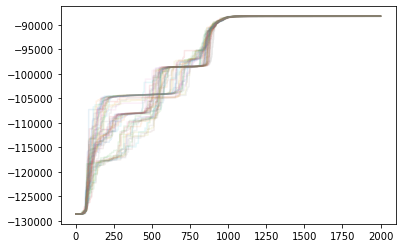

  0%|          | 0/1000 [00:00<?, ?it/s]

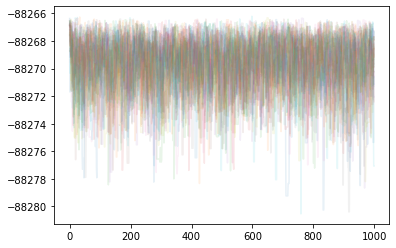

  0%|          | 0/15000 [00:00<?, ?it/s]

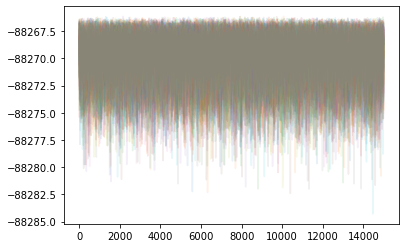

In [45]:
decay = [decay_q00, decay_q01, decay_q02, decay_q03, decay_q04, decay_q05]
ndim = len(decay) + 1
nwalkers = 60

np.random.seed(666)
p0 = [np.array([15.,15., 15.,15.,15.,15., 0.1]) + 1e-6*np.random.rand(ndim) for _ in range(nwalkers)]

print(log_post2(p0[0], decay, time))

sampler_all1 = mc.EnsembleSampler(nwalkers, ndim, log_post2, args=[decay, time])

init = 2000
for i, result in enumerate(tqdm(sampler_all1.sample(p0,iterations = init), total = init)): pass
p1 = sampler_all1.chain[:,-1].copy()

plt.plot(sampler_all1.lnprobability.T, alpha = 0.1)
plt.show()

lx = sampler_all1.lnprobability[-1,:].argsort()
p1 = sampler_all1.chain[-1,lx][-int(nwalkers/2):]

sampler_all2 = mc.EnsembleSampler(int(nwalkers/2), ndim, log_post2, args=[decay, time])
init = 1000
for i, result in enumerate(tqdm(sampler_all2.sample(p1,iterations = init), total = init)): pass
p2 = sampler_all2.chain[:,-1].copy()

plt.plot(sampler_all2.lnprobability.T, alpha = 0.1)
plt.show()

sampler_all2.reset()

init = 15000
for i, result in enumerate(tqdm(sampler_all2.sample(p1,iterations = init), total = init)): pass

plt.plot(sampler_all2.lnprobability.T, alpha = 0.1)
plt.show()

(5358, 7)


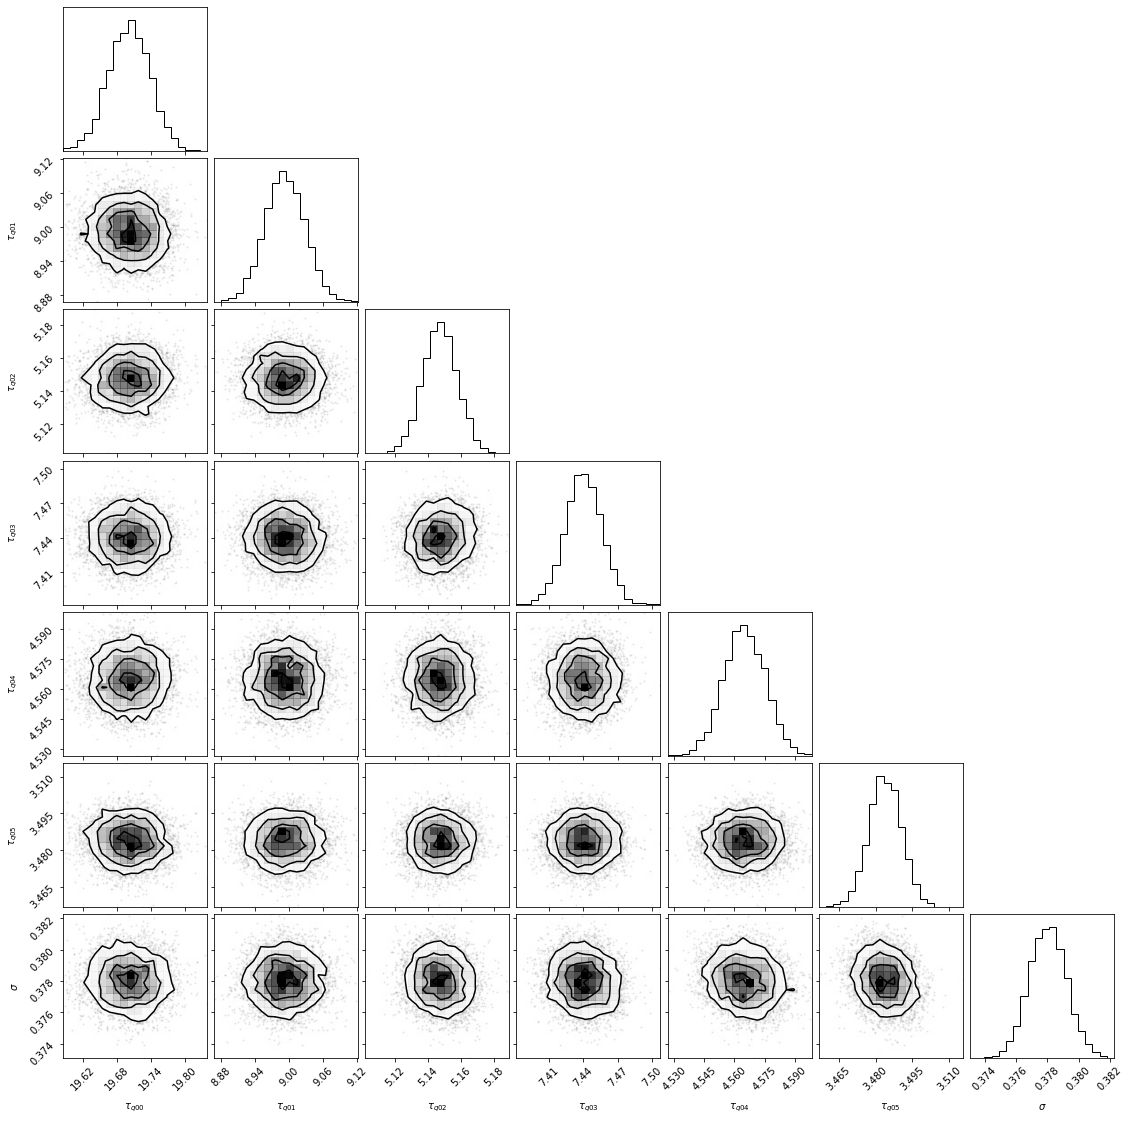

In [46]:
samples_all2 = sampler_all2.get_chain(flat=True)[::int(sampler_all2.get_autocorr_time().max())]
print(samples_all2.shape)
fig = cor.corner(samples_all2, labels = [r'$\tau_{q00}$', r'$\tau_{q01}$', r'$\tau_{q02}$',
                                         r'$\tau_{q03}$', r'$\tau_{q04}$', r'$\tau_{q05}$',
                                        r'$\sigma$'])
plt.show()